Project Overview
The project will involve the following steps:

Load the data: Use pandas to load an online shopping dataset (you can use a sample dataset or generate a mock one).
Data Cleaning: Handle missing values, remove duplicates, and clean the dataset for analysis.
Exploratory Data Analysis (EDA): Understand trends, distributions, and patterns in the data.
Visualization: Use matplotlib to visualize the findings.
Basic Analysis: Conduct a basic analysis on customer behavior and product performance.
1. Create or Use a Dataset
We will create a synthetic dataset for this purpose. Below is a structure for the mock dataset:

In [35]:
import pandas as pd
import numpy as np

# Create a synthetic dataset
np.random.seed(42)

# Generate data

customer_choice = np.array(['Student', 'Teacher', 'Employee', 'Other', 'Member'])

n = 1000
data = {
    'customer_id': np.random.randint(1000, 1100, n),
    'Customer_type': np.random.choice(customer_choice, n),
    'product_id': np.random.randint(1, 50, n),
    'quantity': np.random.randint(1, 5, n),
    'price': np.random.choice([9.99, 19.99, 29.99, 49.99], n),
    'date': pd.date_range('2024-01-01', periods=n, freq='H'),
    'payment_method': np.random.choice(['Credit Card', 'PayPal', 'Debit Card'], n),
}

discount_cus = {
    'Student': 0.8,
    'Teacher': 0.9,
    'Employee': 0.95,
    'Other': 1,
    'Member': 0.7
}

df = pd.DataFrame(data)

# Add some categorical and numeric columns
discount_choice = [discount_cus[cus] for cus in df['Customer_type']]
total = df['quantity'] * df['price']
df['Discount'] = round(total-(total * discount_choice), 1)
df['total_sale'] = total - df['Discount']
df['day_of_week'] = df['date'].dt.day_name()
df['hour_of_day'] = df['date'].dt.hour

df.head()

C:\Users\DELL\AppData\Local\Temp\ipykernel_19868\2447701320.py:18: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  'date': pd.date_range('2024-01-01', periods=n, freq='H'),


,customer_id,Customer_type,product_id,quantity,price,date,payment_method,Discount,total_sale,day_of_week,hour_of_day
0,1051,Teacher,1,3,19.99,2024-01-01 00:00:00,Debit Card,6.0,53.97,Monday,0
1,1092,Student,26,2,49.99,2024-01-01 01:00:00,Credit Card,20.0,79.98,Monday,1
2,1014,Other,43,3,19.99,2024-01-01 02:00:00,Credit Card,0.0,59.97,Monday,2
3,1071,Employee,10,3,49.99,2024-01-01 03:00:00,Debit Card,7.5,142.47,Monday,3
4,1060,Teacher,30,1,9.99,2024-01-01 04:00:00,Credit Card,1.0,8.99,Monday,4


In [41]:
import pandas as pd
import numpy as np

# Create a synthetic dataset
np.random.seed(42)

# Generate data
n = 1000
cost = {
    'Credit Card' : -20,
    'PayPal' : -30,
    'Debit Card' : 20
}
methods = np.random.choice(['Credit Card', 'PayPal', 'Debit Card'], n)
data = {
    'customer_id': np.random.randint(1000, 1100, n),
    'product_id': np.random.randint(1, 50, n),
    'quantity': np.random.randint(1, 5, n),
    'price': np.random.choice([9.99, 19.99, 29.99, 49.99], n),
    'date': pd.date_range('2024-01-01', periods=n, freq='H'),
    'payment_method' : methods,
    'added_charge' : [cost[extra] for extra in methods]
}

df = pd.DataFrame(data)

# Add some categorical and numeric columns
df['total_sale'] = df['quantity'] * df['price']
total_sale = df['quantity'] * df['price']
df['day_of_week'] = df['date'].dt.day_name()
df['hour_of_day'] = df['date'].dt.hour
df['charge_cost'] = total_sale * (df['added_charge']/100)
df['final_cost'] = total_sale+df['charge_cost']

    
df.head()
print(df.head())


   customer_id  product_id  quantity  price                date  \
0         1002          40         4   9.99 2024-01-01 00:00:00   
1         1030          11         2  19.99 2024-01-01 01:00:00   
2         1039           3         2   9.99 2024-01-01 02:00:00   
3         1035           6         2  29.99 2024-01-01 03:00:00   
4         1023           9         1  29.99 2024-01-01 04:00:00   

  payment_method  added_charge  total_sale day_of_week  hour_of_day  \
0     Debit Card            20       39.96      Monday            0   
1    Credit Card           -20       39.98      Monday            1   
2     Debit Card            20       19.98      Monday            2   
3     Debit Card            20       59.98      Monday            3   
4    Credit Card           -20       29.99      Monday            4   

   charge_cost  final_cost  
0        7.992      47.952  
1       -7.996      31.984  
2        3.996      23.976  
3       11.996      71.976  
4       -5.998      23.99

C:\Users\DELL\AppData\Local\Temp\ipykernel_19868\1886682401.py:20: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  'date': pd.date_range('2024-01-01', periods=n, freq='H'),


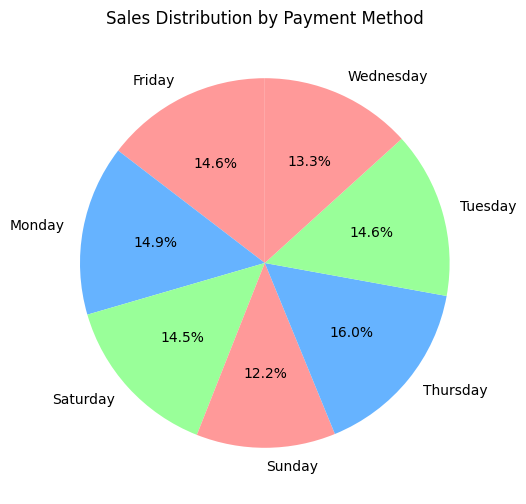

In [50]:
import matplotlib.pyplot as plt
sale_items = df.groupby('day_of_week')['final_cost'].sum()
plt.figure(figsize=(8, 6))
sale_items.plot(kind='pie', autopct='%1.1f%%', startangle=90, colors=['#ff9999','#66b3ff','#99ff99'])
plt.title('Sales Distribution by Payment Method')
plt.ylabel('')
plt.show()


This dataset will have:

customer_id: ID of the customer
product_id: ID of the product
quantity: Number of items purchased
price: Price of a single unit of the product
total_sale: Total amount spent per transaction
date: Date of the transaction
payment_method: Payment method used
day_of_week: The day of the week when the transaction occurred
hour_of_day: The hour of the day when the transaction occurred
2. Data Cleaning (if necessary)
In case you have missing or erroneous data, you can clean it. For instance:

In [43]:
# Check for missing values
print(df.isnull().sum())

# Drop rows with missing values if any
df.dropna(inplace=True)

# Remove duplicates
df.drop_duplicates(inplace=True)


customer_id       0
product_id        0
quantity          0
price             0
date              0
payment_method    0
added_charge      0
total_sale        0
day_of_week       0
hour_of_day       0
charge_cost       0
final_cost        0
dtype: int64


3. Exploratory Data Analysis (EDA)
Now, let’s perform some basic analysis to explore the dataset.

A. Basic Summary Statistics

In [44]:
# Summary statistics for numeric columns
print(df.describe())


       customer_id  product_id     quantity        price  \
count  1000.000000  1000.00000  1000.000000  1000.000000   
mean   1049.051000    24.50800     2.498000    27.450000   
min    1000.000000     1.00000     1.000000     9.990000   
25%    1024.000000    12.00000     1.000000     9.990000   
50%    1048.000000    24.00000     3.000000    29.990000   
75%    1074.000000    37.00000     4.000000    49.990000   
max    1099.000000    49.00000     4.000000    49.990000   
std      29.152329    14.07345     1.137229    14.918813   

                                date  added_charge   total_sale  hour_of_day  \
count                           1000    1000.00000  1000.000000  1000.000000   
mean   2024-01-21 19:29:59.999999744     -10.50000    69.785020    11.436000   
min              2024-01-01 00:00:00     -30.00000     9.990000     0.000000   
25%              2024-01-11 09:45:00     -30.00000    29.970000     5.000000   
50%              2024-01-21 19:30:00     -20.00000    59.97

B. Group Data by Day of the Week and Calculate Sales

In [45]:
# Total sales per day of the week
sales_by_day = df.groupby('day_of_week')['total_sale'].sum().sort_values(ascending=False)
print(sales_by_day)


day_of_week
Thursday     11006.28
Monday       10496.54
Saturday     10336.29
Tuesday      10086.48
Friday        9886.34
Wednesday     9386.60
Sunday        8586.49
Name: total_sale, dtype: float64


C. Distribution of Sales by Hour of Day

In [46]:
# Sales distribution by hour
sales_by_hour = df.groupby('hour_of_day')['total_sale'].sum()
print(sales_by_hour)


hour_of_day
0     2908.86
1     4058.81
2     2819.05
3     2358.99
4     2839.03
5     2938.99
6     2919.00
7     2639.03
8     2888.87
9     3218.88
10    3348.98
11    2508.93
12    2599.07
13    3148.82
14    2758.93
15    2938.96
16    3458.85
17    2948.94
18    2838.97
19    3148.98
20    2409.09
21    2928.95
22    2388.99
23    2769.05
Name: total_sale, dtype: float64


4. Data Visualization
Now let’s use matplotlib to visualize the data.

A. Total Sales per Day of the Week

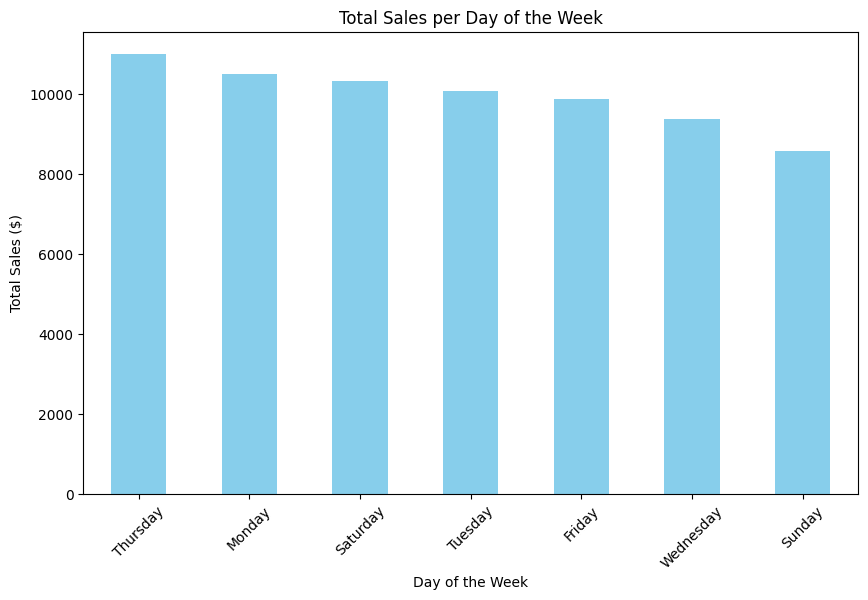

In [47]:


# Sales by day of the week
plt.figure(figsize=(10, 6))
sales_by_day.plot(kind='bar', color='skyblue')
plt.title('Total Sales per Day of the Week')
plt.xlabel('Day of the Week')
plt.ylabel('Total Sales ($)')
plt.xticks(rotation=45)
plt.show()


B. Sales Distribution by Hour of the Day

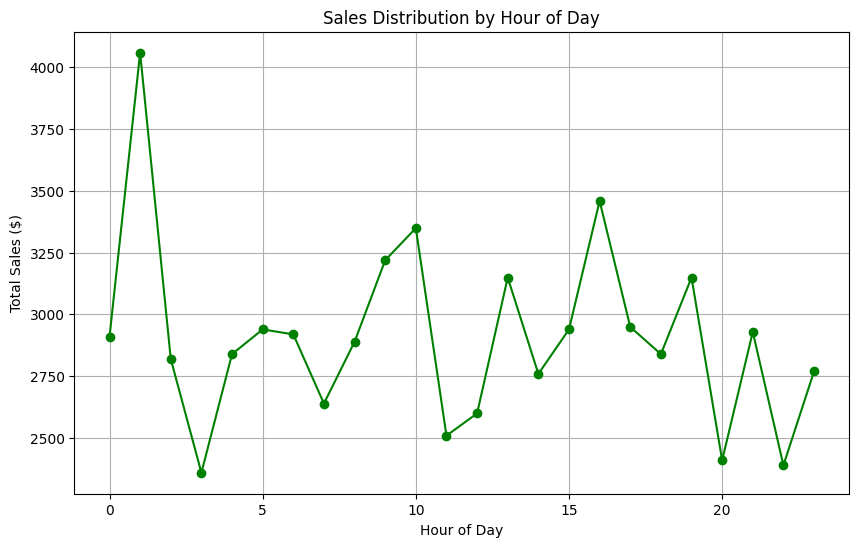

In [48]:
# Sales by hour of the day
plt.figure(figsize=(10, 6))
sales_by_hour.plot(kind='line', marker='o', color='green')
plt.title('Sales Distribution by Hour of Day')
plt.xlabel('Hour of Day')
plt.ylabel('Total Sales ($)')
plt.grid(True)
plt.show()


C. Total Sales by Payment Method

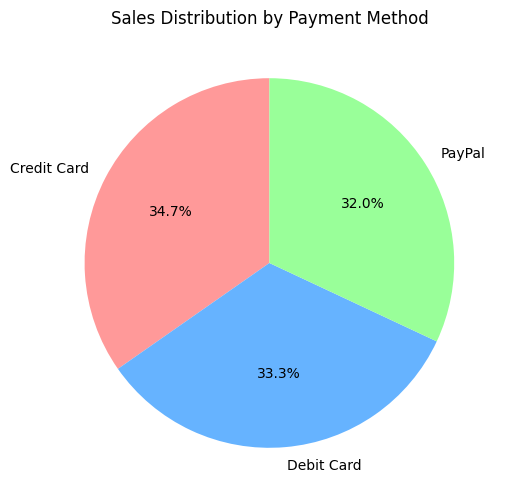

In [49]:
# Total sales by payment method
sales_by_payment = df.groupby('payment_method')['total_sale'].sum()

plt.figure(figsize=(8, 6))
sales_by_payment.plot(kind='pie', autopct='%1.1f%%', startangle=90, colors=['#ff9999','#66b3ff','#99ff99'])
plt.title('Sales Distribution by Payment Method')
plt.ylabel('')
plt.show()


5. Insights and Findings
After running the above code, you’ll have insights like:

Which day of the week has the highest total sales.
The distribution of sales based on the time of day.
The popularity of different payment methods.